In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache


Bad key "text.kerning_factor" on line 4 in
E:\miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_directory = 'ecephys_project_cache' # must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head(20)

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [4]:
#filtered_sessions = sessions[(sessions.session_type == 'brain_observatory_1.1') & \
#                             (['VISp' in acronyms for acronyms in 
#                               sessions.ecephys_structure_acronyms])]

appended_histogram = []
my_data = list()
my_data_even = list()

session = cache.get_session_data(742951821,
                                 isi_violations_maximum = np.inf,
                                 amplitude_cutoff_maximum = np.inf,
                                 presence_ratio_minimum = -np.inf
                                )

presentations = session.get_stimulus_table("flashes")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISrl']

time_step = 0.01
time_bins = np.arange(-0.1, 2.0 + time_step, time_step)

    # histogram for odd presentation index
histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)


E:\miniconda3\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:637: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84),

In [54]:
flash_time = presentations.start_time.to_frame()
flash_time.to_csv(r'E:\allen_neuropixels\session_754312389_flash_time.csv')

In [55]:
pupil = session.get_pupil_data()
pupil
pupil_diameter = pupil.pupil_width.to_frame()
pupil_diameter.to_csv(r'E:\allen_neuropixels\session_754312389_pupil_width.csv')

This ecephys session '739448407' has no eye tracking data. (NWB error: "'eye_tracking' not found in modules of NWBFile 'root'")


In [5]:
mean_histograms_rep = histograms.mean(dim="unit_id")
    
mean_histograms1_rep = mean_histograms_rep.to_pandas()


mean_histograms_id = histograms.mean(dim="stimulus_presentation_id")

mean_histograms1_id = mean_histograms_id.to_pandas()
mean_histograms1_id = mean_histograms1_id.transpose()

mean_histograms1_rep.to_csv (r'E:\allen_neuropixels\session_742951821_VISrl_2s_by_presentation.csv', index = True, header=True)
mean_histograms1_id.to_csv (r'E:\allen_neuropixels\session_742951821_VISrl_2s_by_id.csv', index = True, header=True)


In [61]:
mean_histograms1_rep

stimulus_presentation_id,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,...,3787,3788,3789,3790,3791,3792,3793,3794,3795,3796
time_relative_to_stimulus_onset,,,,,,,,,,,,,,,,,,,,,
-0.095,0.000000,0.000000,0.090164,0.016393,0.040984,0.057377,0.024590,0.008197,0.024590,0.024590,...,0.008197,0.032787,0.057377,0.040984,0.024590,0.049180,0.008197,0.040984,0.032787,0.024590
-0.085,0.008197,0.032787,0.090164,0.016393,0.008197,0.073770,0.024590,0.008197,0.008197,0.008197,...,0.024590,0.040984,0.049180,0.081967,0.040984,0.008197,0.008197,0.024590,0.024590,0.016393
-0.075,0.016393,0.024590,0.032787,0.008197,0.000000,0.024590,0.024590,0.057377,0.008197,0.016393,...,0.016393,0.040984,0.016393,0.024590,0.016393,0.024590,0.024590,0.098361,0.049180,0.016393
-0.065,0.016393,0.016393,0.057377,0.008197,0.000000,0.049180,0.008197,0.016393,0.008197,0.016393,...,0.040984,0.016393,0.049180,0.008197,0.008197,0.040984,0.049180,0.057377,0.081967,0.008197
-0.055,0.016393,0.024590,0.081967,0.008197,0.000000,0.040984,0.000000,0.057377,0.008197,0.008197,...,0.016393,0.040984,0.024590,0.024590,0.040984,0.032787,0.024590,0.032787,0.032787,0.016393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.955,0.024590,0.024590,0.000000,0.000000,0.049180,0.024590,0.024590,0.016393,0.000000,0.008197,...,0.024590,0.000000,0.000000,0.049180,0.016393,0.032787,0.049180,0.016393,0.008197,0.049180
1.965,0.032787,0.008197,0.000000,0.016393,0.065574,0.008197,0.016393,0.000000,0.024590,0.008197,...,0.032787,0.016393,0.024590,0.024590,0.008197,0.008197,0.049180,0.032787,0.032787,0.008197
1.975,0.000000,0.016393,0.008197,0.000000,0.040984,0.000000,0.065574,0.016393,0.024590,0.024590,...,0.024590,0.040984,0.008197,0.024590,0.016393,0.024590,0.057377,0.008197,0.008197,0.016393


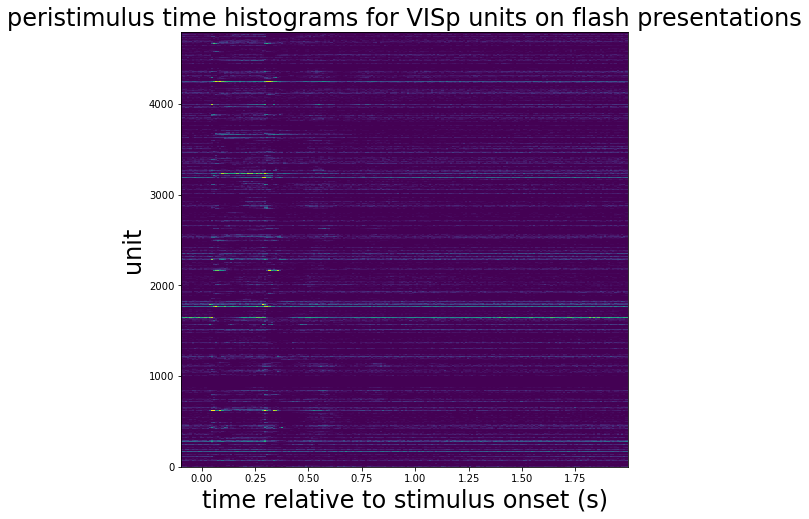

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    appended_histogram2["time_relative_to_stimulus_onset"], 
    np.arange(appended_histogram2["unit_id"].size),
    appended_histogram2.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()
# plt.savefig('PM_PSTH.svg')